In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing Dataset
db = pd.read_csv("data1.csv")     
db = np.array(db.iloc[:,1:3])
db

array([[-2.73226642,  0.11453887],
       [-0.22062047,  0.99308232],
       [ 3.3841416 , -0.95665906],
       ...,
       [ 3.56339167,  0.43936267],
       [-3.59822956,  0.1965186 ],
       [ 4.02733159, -0.19364141]])

In [2]:
#function to return list of indices of points in its epslon neighbor of a given point
def nb_ind(db, i, eps):
    nb = []
    for k in range(len(db)):
        if np.linalg.norm(db[i] - db[k]) < eps:
            nb.append(k)
    return nb

def dbscan(db, eps, minpts):
    clusters = [0]*len(db)  #iniatlizing all data points to cluster 0  
    c_cluster= 0 #current cluster 
    for i in range(len(db)):
        if (clusters[i] != 0):continue #checking wheather the point is already assigned to a cluster
        nb = nb_ind(db, i, eps) #neighbors(nb) to store indices of neighbor
        if len(nb) < minpts: # checking wheather the point satisfies minpts condition
            clusters[i] = -1    #if it doesn't satisfy it is labeled as noise
        else:
            c_cluster = c_cluster+1 
            clusters[i] = c_cluster # assigning current cluster to the data point
            j = 0 
            while j < len(nb): # moving in the neighbourhood of point
                i = nb[j]
                if clusters[i] == -1:clusters[i] = c_cluster #if the neighbor point is labeled as noice assigning it to cluster(boundary point)
                elif clusters[i] == 0:
                    clusters[i] = c_cluster
                    p_nb = nb_ind(db, i, eps) #neighborhood of present point
                    if len(p_nb) >= minpts: #checking weather present point is a core point
                        nb = nb + p_nb # if present point is core point adding its neighborhood to cluster thus expanding cluster
                j = j+1
    return clusters #return indices of cluster corresponding to the point


In [3]:
lb = dbscan(db,0.3,50) 

[-1  1  2  3  4] [ 42 508 474 513 463]


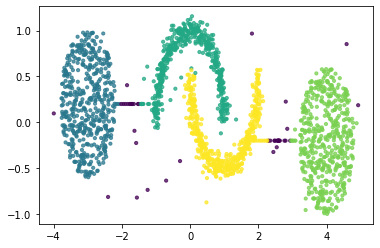

In [4]:
#plotting the clustered dataset colered as per its cluster
plt.scatter(db[:,0],db[:,1],alpha=0.75,s=10,c=lb)
unique, counts = np.unique(lb, return_counts=True)
print(unique,counts) #(cluster_labels,no. of points in the corresponding cluster)

In [5]:
#importing the data as numpy array
df = pd.read_csv("data2.csv")     
df = np.array(df.iloc[:,0:2])
df

array([[ 67.06292382, 176.0863547 ],
       [ 68.80409404, 178.38866853],
       [ 60.93086317, 170.28449577],
       [ 59.73384301, 168.6919918 ],
       [ 65.43123003, 173.76367903],
       [ 61.57716033, 168.09175124],
       [ 63.34186626, 170.64251603],
       [ 61.04164336, 170.09668166],
       [ 62.63362335, 171.86297157],
       [ 53.40785962, 162.75684311],
       [ 62.93820031, 168.71007855],
       [ 68.5548571 , 176.4737468 ],
       [ 65.1630426 , 171.17658204],
       [ 53.44601711, 162.91516701],
       [ 60.65937349, 170.64765908],
       [ 59.17655435, 169.19080975],
       [ 67.16384091, 176.33706853],
       [ 60.6270339 , 169.84811911],
       [ 53.96476395, 162.4905542 ],
       [ 60.35999202, 169.89078752],
       [ 59.85687102, 168.85468537],
       [ 68.02783468, 177.0751606 ],
       [ 64.59160046, 170.06283827],
       [ 53.55139341, 162.25694859],
       [ 60.44702902, 170.00817842],
       [ 54.83092473, 163.76973667],
       [ 69.30872116, 177.11158493],
 

In [6]:
lb = dbscan(df,eps =0.5,minpts =10) # calling dbscan function

[-1  1  2  3  4  5] [115  85  91 102 100   7]


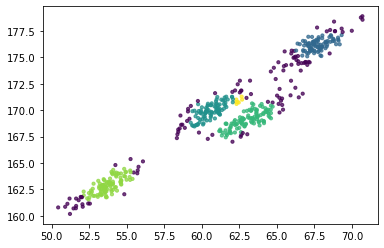

In [7]:
plt.scatter(df[:,0],df[:,1],alpha=0.75,s=10,c=lb) #ploting points with same cluster with same color 
unique, counts = np.unique(lb, return_counts=True) # unique labels of cluster,no. points in corresponding cluster
print(unique,counts)